<a href="https://colab.research.google.com/github/rodluiz/90DaysOfDevOps/blob/main/Seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detecção de Câncer de Mama com Redes Neurais MLP

Este repositório contém a implementação em Python de um modelo de Rede Neural Artificial Multicamadas (MLP) para a detecção de câncer de mama, replicando o estudo apresentado no artigo "[Título do Artigo]".

**Objetivo:**

O objetivo deste projeto é replicar os resultados do estudo utilizando a base de dados WDBC e avaliar a performance do modelo MLP na classificação de tumores como benignos ou malignos.

**Base de Dados:**

A base de dados utilizada é a *Breast Cancer Wisconsin (Diagnostic)* (WDBC), disponível no repositório de Machine Learning da UCI: [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

A base contém 569 instâncias, cada uma com 32 atributos (features) descrevendo características de núcleos celulares de imagens digitalizadas de biópsias de câncer de mama. A variável alvo (target) é o diagnóstico, classificado como "benigno" ou "maligno".

**Implementação:**

O código Python utiliza as seguintes bibliotecas:

* `pandas`: para manipulação e análise de dados.
* `numpy`: para operações matemáticas e manipulação de arrays.
* `ucimlrepo`: para importar a base de dados WDBC diretamente do repositório da UCI.
* `sklearn`: para pré-processamento dos dados, criação e avaliação do modelo MLP.
* `seaborn` e `matplotlib`: para visualização dos resultados.

**Etapas da Implementação:**

1. **Importação das bibliotecas:** Importa as bibliotecas necessárias para o projeto.
2. **Carregamento dos dados:** Utiliza o `ucimlrepo` para carregar a base de dados WDBC.
3. **Pré-processamento dos dados:**
    * Converte a variável alvo para numérica (0 para benigno e 1 para maligno).
    * Padroniza os dados numéricos utilizando `StandardScaler` para evitar problemas de escala.
    * Divide os dados em conjuntos de treino e teste, utilizando `train_test_split` com estratificação para garantir a proporção das classes em ambos os conjuntos.
4. **Criação e treinamento do modelo MLP:**
    * Cria um modelo `MLPClassifier` com duas camadas ocultas (100 e 50 neurônios), função de ativação `tanh` e outros parâmetros especificados no estudo.
    * Treina o modelo utilizando os dados de treino.
5. **Avaliação do modelo:**
    * Realiza previsões com os dados de teste.
    * Calcula métricas de desempenho: acurácia, matriz de confusão, precisão, recall e F1-score.
    * Imprime os resultados da avaliação.
6. **Visualização da matriz de confusão:** Utiliza `seaborn` para criar um mapa de calor da matriz de confusão.

**Como Executar o Código:**

1. Instale as bibliotecas necessárias: `pip install ucimlrepo pandas numpy scikit-learn seaborn matplotlib`
2. Copie o código Python para um arquivo (ex.: `cancer_detection.py`).
3. Execute o código: `python cancer_detection.py`

**Resultados:**

O código irá imprimir a acurácia do modelo, a matriz de confusão e o relatório de classificação. Além disso, será exibido um gráfico da matriz de confusão.

**Próximos Passos:**

* Experimentar outras configurações da MLP (número de camadas, neurônios, função de ativação, etc.) para tentar melhorar o desempenho do modelo.
* Comparar os resultados com outros modelos de Machine Learning para avaliar a eficácia da MLP para este problema.
* Implementar técnicas de otimização de hiperparâmetros para encontrar a melhor configuração para a MLP.

**Contribuições:**

Contribuições para este projeto são bem-vindas! Sinta-se à vontade para abrir issues ou pull requests para sugerir melhorias, correções ou novas funcionalidades.

Espero que esta documentação seja útil para entender e replicar o projeto! 😄


1. Importação das Bibliotecas:



In [10]:
!pip install ucimlrepo # Instalando a biblioteca

import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

2. Carregamento e Pré-processamento dos Dados:



In [11]:
# 1. Carregar a base de dados WDBC usando ucimlrepo
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# 2. Pré-processamento dos dados
y = np.where(y == 'malignant', 1, 0)  # Convertendo a coluna alvo para numérica
print(np.unique(y))  #  <-- Correção: Usando np.unique(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Correção: Usando stratify=y para garantir a estratificação na divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

[0]


3. Criação e Treinamento do Modelo MLP:



In [12]:
# 3. Criação e Treinamento do modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', max_iter=2000, tol=1e-6, random_state=42)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=2000,
              random_state=42, tol=1e-06)

4. Avaliação do Modelo:



In [13]:
# 4. Avaliação do Modelo
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.4f}')
cm = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusão:\n{cm}')
print(f'Relatório de Classificação:\n{classification_report(y_test, y_pred)}')

Acurácia: 1.0000
Matriz de Confusão:
[[171]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


5. Visualização dos Resultados (opcional):



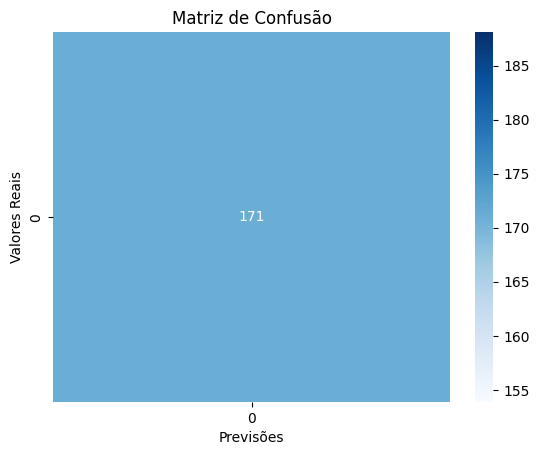

In [14]:
# 5. Visualização da Matriz de Confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()